In [75]:

# Load libraries 
import numpy 
from numpy import arange
from pandas import read_csv 
from pandas import set_option 
from pandas.plotting import scatter_matrix 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
# let us our dataset (Train)

train = pd.read_csv('train_loan.csv')

In [6]:
# Take a quick peek
train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
# We would expect Dependents to be numerical, infact an integer but it is not. Can you see the 3+?
# This is treated as a discrete variable
# Credit history is not numerical either, (0-1)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [ ]:
# As we can see, the dataset as 614 rows and 13 columns.
# If we look closer, you will noticed that some columns has missing data. eg Self_Employed column

In [26]:
# Check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
# summary of numerical fields by using describe() function
set_option('precision', 2) # one decimal place
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


In [ ]:
# Here are a few inferences, you can draw by looking at the output of describe() function:
# LoanAmount has (614 – 592) 22 missing values.
# Loan_Amount_Term has (614 – 600) 14 missing values.
# Credit_History has (614 – 564) 50 missing values.
# We can also see that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
# The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

For the non-numerical values (e.g. Property_Area, Credit_History etc.),
we can look at frequency distribution to understand whether they make sense or not.

train['Property_Area'].value_counts()

In [9]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [37]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
# Take a look at the outcome variable: 'Loan_Status'
print(train['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


# Distribution analysis

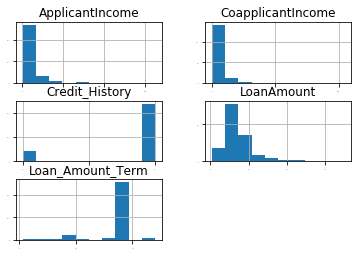

In [17]:

# histograms 
train.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1) 
plt.show()

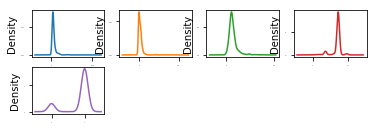

In [18]:

# density 
train.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1) 
plt.show()

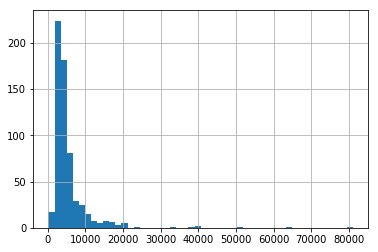

In [19]:
train['ApplicantIncome'].hist(bins=50)

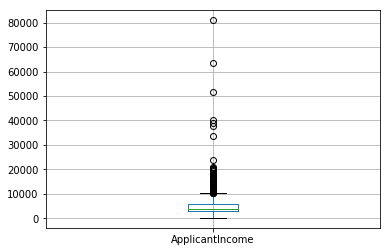

In [20]:
train.boxplot(column='ApplicantIncome')

In [ ]:
# This confirms the presence of a lot of outliers/extreme values. 
# This can be attributed to the income disparity in the society.
# Part of this can be driven by the fact that we are looking at people with different education levels. 

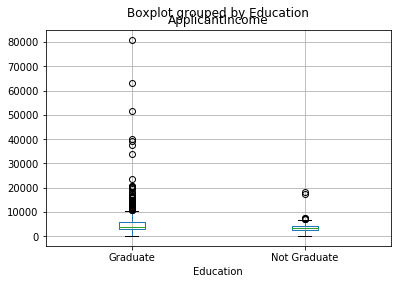

In [21]:
train.boxplot(column='ApplicantIncome', by = 'Education')

In [ ]:
# The average of the two classes are not too dissimilar but the potential to earn more increases as a graduate

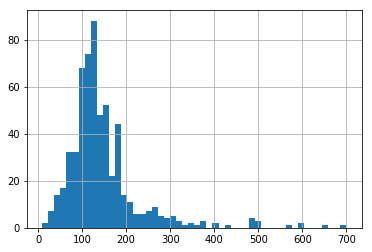

In [22]:
train['LoanAmount'].hist(bins=50)

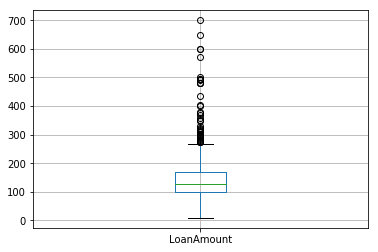

In [23]:
train.boxplot(column='LoanAmount')

In [ ]:
# Again, there are some extreme values. 
# Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. 
# LoanAmount has missing data as well as extreme values, while ApplicantIncome has a few extreme values, which demand deeper understanding. 
# We will take this up in coming sections.

# Categorical variable analysis

In [ ]:
# We will use Excel style pivot table and cross-tabulation
# loan status has been coded as 1 for Yes and 0 for No

In [29]:
temp1 = train['Credit_History'].value_counts(ascending=True)
temp2 = train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbability of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                    0.08
1.0                    0.80


In [40]:
temp4 = train['Gender'].value_counts(ascending=True)
temp5 = train.pivot_table(values='Loan_Status',index=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Gender:') 
print (temp4)

print ('\nProbability of getting loan for each Gender class:')
print (temp5)

Frequency Table for Gender:
Female    112
Male      489
Name: Gender, dtype: int64

Probability of getting loan for each Gender class:
        Loan_Status
Gender             
Female         0.67
Male           0.69


Text(0.5,1,'Probability of getting loan by credit history')

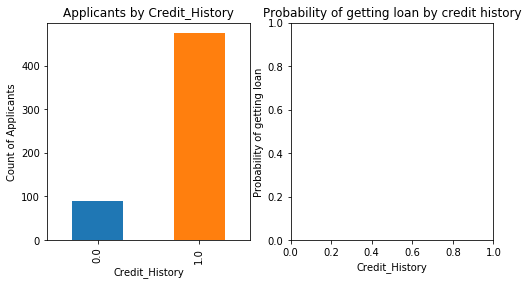

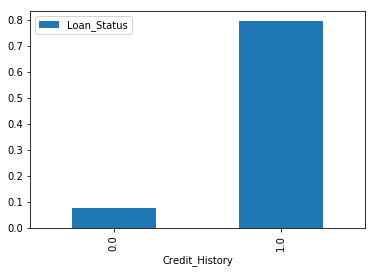

In [30]:
# let us plot the outcome
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

Text(0.5,1,'Probability of getting loan by Gender')

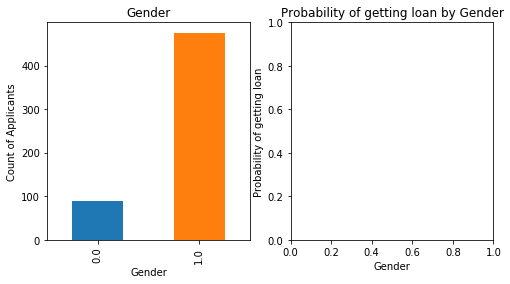

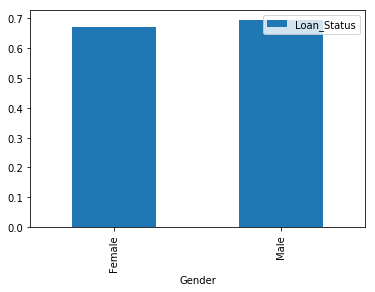

In [43]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Gender")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp5.plot(kind = 'bar')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by Gender")

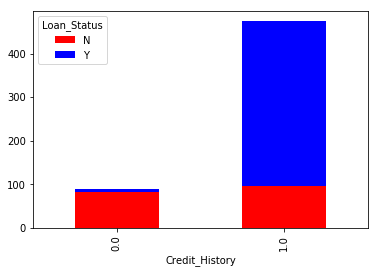

In [31]:
#Alternately, these two plots can also be visualized by combining them in a stacked chart

temp3 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

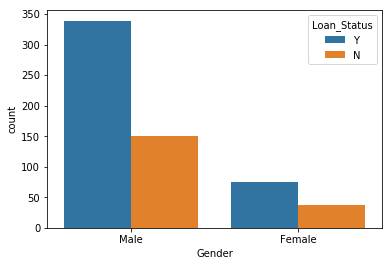

In [36]:
sns.countplot(x='Gender', hue='Loan_Status', data=train)

# Data Munging

In [51]:
# First deal with missing data
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
# Though the missing values are not very high in number, but many variables have them and each one of these should be estimated and added in the data
# Roughly 10% or less across each attributes

In [47]:
# Let's start with the numericals first
# We can just replace the missing values using the mean

# train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

# But will instead use imputation
# A key hypothesis is that the whether a person is educated or self-employed can combine to give a good estimate of loan amount

In [48]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [50]:
train['Self_Employed'].fillna('No', inplace = True)

In [52]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
# we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features

In [55]:
table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [56]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
# We will fill the remaining missing values with the mode()

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [58]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Dealing with extreme values

In [60]:
# LoanAmount and ApplicantIncome we won't treat these as outliers
# log transformation to nullify their effect

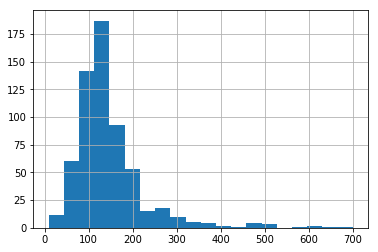

In [62]:
# LoanAmount first without log transformation

train['LoanAmount'].hist(bins=20)

In [63]:
# We can see that this is right skewed

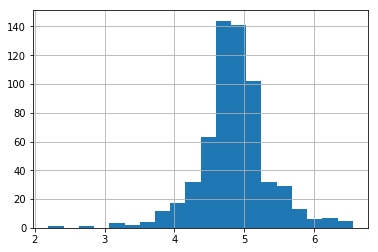

In [64]:
# With log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [65]:
# Now we have a semblance of a normal distribution

In [66]:
# Now for applicants income
# Since applicant on lower income may need the support of a co-applicant, we will combine both income and do a log transformation

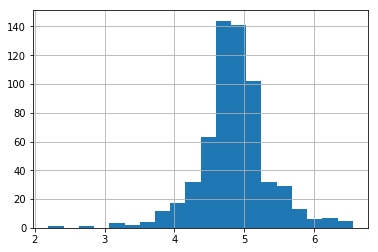

In [67]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['LoanAmount_log'].hist(bins=20)

In [69]:
# save our clean data
train.to_csv('loanTrain_clean.csv')

# Building a Predictive Model in Python

In [73]:
# Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories

In [74]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
train.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

# Logistic Regression

In [77]:
# Intuitive hypothesis

# Applicants having a credit history
# Applicants with higher applicant and co-applicant incomes
# Applicants with higher education level
# Properties in urban areas with high growth perspectives

In [88]:
# We will use a hold dataset for validation
# Something like a 70/30 split
# 70% for training and 30% for testing

In [92]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [93]:

# Prepare Data
validation_size = 0.30
seed = 7

#Spliting data into Feature

x=train[['Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Credit_History', 'Property_Area',
       'LoanAmount_log', 'TotalIncome_log']]
y=train['Loan_Status']


# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

In [94]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:

predictions = logmodel.predict(x_test)

In [96]:

from sklearn.metrics import classification_report

In [97]:

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.46      0.62        61
          1       0.79      0.98      0.87       124

avg / total       0.84      0.81      0.79       185



In [99]:
from sklearn.metrics import accuracy_score

In [100]:
print(accuracy_score(y_test, predictions))

0.8108108108108109


In [101]:
d_model = DecisionTreeClassifier()
d_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [102]:
dpred = d_model.predict(x_test)

In [103]:
print(classification_report(y_test,dpred))
print(accuracy_score(y_test, dpred))

             precision    recall  f1-score   support

          0       0.58      0.54      0.56        61
          1       0.78      0.81      0.79       124

avg / total       0.71      0.72      0.72       185

0.7189189189189189


In [104]:
# We can see that a decision tree, perform a little worst than our regression

In [108]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
r_model = RandomForestClassifier(n_estimators=100)
r_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
rpred = r_model.predict(x_test)

In [110]:
print(classification_report(y_test,rpred))
print(accuracy_score(y_test, rpred))

             precision    recall  f1-score   support

          0       0.79      0.51      0.62        61
          1       0.79      0.94      0.86       124

avg / total       0.79      0.79      0.78       185

0.7945945945945946


In [114]:
#Create a series with feature importances:
from tabulate import tabulate

headers = ["name", "score"]
values = sorted(zip(x_train.columns, r_model.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name                 score
TotalIncome_log  0.290438
Credit_History   0.254352
LoanAmount_log   0.247098
Dependents       0.0524907
Property_Area    0.049818
Married          0.034197
Education        0.0259191
Self_Employed    0.0244234
Gender           0.0212637


In [115]:
# Let us the top five features
x2 = train[['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']]
y2 = train['Loan_Status']

In [116]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=validation_size, random_state=seed)

In [117]:
model2 = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
model2.fit(x2_train, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
rpred2 = model2.predict(x2_test)

In [119]:
print(classification_report(y2_test,rpred2))
print(accuracy_score(y2_test, rpred2))

             precision    recall  f1-score   support

          0       0.91      0.52      0.67        61
          1       0.81      0.98      0.88       124

avg / total       0.84      0.83      0.81       185

0.827027027027027


In [ ]:
# Now we have much better prediction with the top variables